In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Using Theano backend.


In [2]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv('train_minimal_128.csv',header = 0, index_col=0)
print(train.shape)
train.head()

(10000, 16390)


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,000016.jpg,-1,-1,1,-1,0,23,23,23,23,...,29,30,30,30,31,32,33,34,33,32
1,000025.jpg,-1,-1,-1,-1,0,85,89,88,81,...,79,75,77,71,72,75,77,82,81,75
2,000026.jpg,-1,-1,-1,-1,0,172,169,175,184,...,74,96,96,99,112,129,122,87,61,62
3,000028.jpg,-1,-1,1,-1,0,233,231,231,234,...,178,184,187,186,191,191,193,191,187,187
4,000037.jpg,-1,-1,-1,1,0,77,76,74,73,...,57,57,57,57,57,57,57,57,57,57


In [3]:
test= pd.read_csv('verify_minimal_128.csv',header = 0, index_col=0)
print(test.shape)
test.head()

(2000, 16390)


,Image,Eyeglasses,Mustache,Smiling,Wearing_Hat,Type,0,1,2,3,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,162783.jpg,-1,-1,-1,-1,1,206,206,206,206,...,214,215,216,215,215,214,213,213,213,213
1,162807.jpg,1,-1,-1,-1,1,100,101,93,80,...,33,28,31,33,30,30,37,38,34,33
2,162813.jpg,-1,-1,1,-1,1,58,58,56,57,...,41,40,40,40,41,42,43,43,43,43
3,162827.jpg,-1,-1,-1,-1,1,79,77,77,80,...,176,199,196,188,168,143,145,150,170,180
4,162844.jpg,-1,-1,-1,1,1,42,42,42,42,...,204,204,204,204,204,205,206,206,206,206


In [4]:
import utils
X_train = (train.ix[:,6:].values).astype('float32') # all pixel values
#X_train = train.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1).astype('float32')

Y_train = train[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_train = Y_train.apply(utils.create_digits, axis = 1)
print(Y_train.value_counts())

y_train = Y_train.values.astype('int32') # only labels i.e targets digits
X_test = test.ix[:,6:].values.astype('float32')
#X_test = test.drop(['Image','Eyeglasses','Mustache','Smiling','Wearing_Hat','Type'], axis=1).astype('float32')

4    2000
3    2000
2    2000
1    2000
0    2000
dtype: int64


In [5]:
#X_train.shape
# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

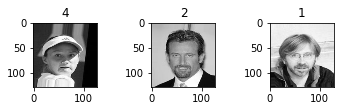

In [6]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 128, 128)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [7]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 128, 128,1)
X_train.shape

(10000, 128, 128, 1)

In [8]:
X_test = X_test.reshape(X_test.shape[0], 128, 128,1)
X_test.shape

(2000, 128, 128, 1)

In [9]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

5

In [10]:
Y_test = test[['Eyeglasses','Mustache','Smiling','Wearing_Hat']]
Y_test = Y_test.apply(utils.create_digits, axis = 1)
y_test= to_categorical(Y_test)
num_classes = y_test.shape[1]
num_classes

5

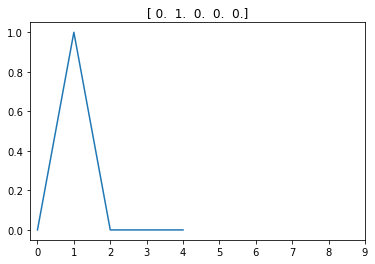

In [11]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [12]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [13]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
#x_train = np.random.random((100, 100, 100, 3))
#y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
#x_test = np.random.random((20, 100, 100, 3))
#y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
#history=model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data = (X_test,y_test), verbose=2)
history = model.fit(X_train, y_train, batch_size=64, epochs=10,verbose=1, validation_data = (X_test,y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 1644s - loss: 1.3692 - acc: 0.4223 - val_loss: 1.0246 - val_acc: 0.6225
Epoch 2/10
10000/10000 [==============================] - 1639s - loss: 0.8115 - acc: 0.6983 - val_loss: 0.5861 - val_acc: 0.7855
Epoch 3/10
10000/10000 [==============================] - 1639s - loss: 0.5441 - acc: 0.8035 - val_loss: 0.4429 - val_acc: 0.8380
Epoch 4/10
10000/10000 [==============================] - 1641s - loss: 0.4522 - acc: 0.8376 - val_loss: 0.4130 - val_acc: 0.8485
Epoch 5/10
10000/10000 [==============================] - 1639s - loss: 0.3952 - acc: 0.8551 - val_loss: 0.4239 - val_acc: 0.8530
Epoch 6/10
10000/10000 [==============================] - 1627s - loss: 0.3458 - acc: 0.8762 - val_loss: 0.3823 - val_acc: 0.8615
Epoch 7/10
10000/10000 [==============================] - 1632s - loss: 0.2920 - acc: 0.8904 - val_loss: 0.4099 - val_acc: 0.8480
Epoch 8/10
10000/10000 [=================

In [15]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10,verbose=1, validation_data = (X_test,y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 1645s - loss: 0.1657 - acc: 0.9413 - val_loss: 0.4797 - val_acc: 0.8570
Epoch 2/10
10000/10000 [==============================] - 1639s - loss: 0.1490 - acc: 0.9447 - val_loss: 0.4809 - val_acc: 0.8570
Epoch 3/10
10000/10000 [==============================] - 1642s - loss: 0.1222 - acc: 0.9568 - val_loss: 0.5141 - val_acc: 0.8610
Epoch 4/10
10000/10000 [==============================] - 1643s - loss: 0.1118 - acc: 0.9578 - val_loss: 0.4923 - val_acc: 0.8565
Epoch 5/10
10000/10000 [==============================] - 1645s - loss: 0.0937 - acc: 0.9665 - val_loss: 0.5643 - val_acc: 0.8590
Epoch 6/10
10000/10000 [==============================] - 1648s - loss: 0.0895 - acc: 0.9676 - val_loss: 0.5605 - val_acc: 0.8620
Epoch 7/10
10000/10000 [==============================] - 1648s - loss: 0.0851 - acc: 0.9688 - val_loss: 0.5448 - val_acc: 0.8555
Epoch 8/10
10000/10000 [=================

In [15]:
score = model.evaluate(X_test, y_test, batch_size=32)
score

2000/2000 [==============================] - 110s   


[0.42393955874443057, 0.85299999999999998]

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

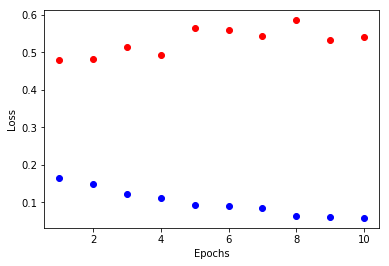

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

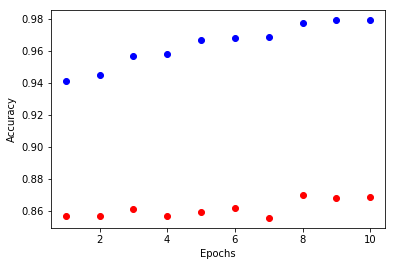

In [18]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'ro')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [19]:
from keras.models import load_model
model.save('my_vgg.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
__________

In [ ]:
# returns a compiled model
# identical to the previous one
model = load_model('my_vgg.h5')